# Cluster Heterokaryon RNA-seq

Cluster RNA-seq trajectories of different genes/

In [106]:
library(ggplot2)
library(matrixStats)
library(patchwork)
library(reshape2)
library(ggrepel)
library(ClusterR)
library(viridis)
library(scales)


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal




In [2]:
tpm_het = read.table("/users/surag/kundajelab/scATAC-reprog/resources/GSE103509/tpm.matrix.txt", sep='\t', header=T)
tpm_het = tpm_het[tpm_het$Gene!="None", ]
tpm_het = tpm_het[!duplicated(tpm_het$Gene),]
rownames(tpm_het) = tpm_het$Gene
tpm_het$Gene = NULL
tpm_het$Ensembl = NULL

tpm_het["GAPDH",]

,GSM2772599_hFb_MRC5_rep1,GSM2772600_hFb_MRC5_rep2,GSM2772601_hFb_MRC5_rep3,GSM2772602_Co.cult_rep1,GSM2772603_Co.cult_rep2,GSM2772604_co.cult_rep3,GSM2772605_30min_rep1,GSM2772606_30min_rep2,GSM2772607_30min_rep3,GSM2772608_2h_rep1,⋯,GSM2772610_2h_rep3,GSM2772611_6h_rep1,GSM2772612_6h_rep2,GSM2772613_6h_rep3,GSM2772614_12h_rep1,GSM2772615_12h_rep2,GSM2772616_12h_rep3,GSM2772617_24h_rep1,GSM2772618_24h_rep2,GSM2772619_24h_rep3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GAPDH,4909.54,4797.98,3419.12,5400.76,5767.35,4277.84,5474.26,5490.53,4537.26,4826.46,⋯,4173.66,5217.96,5214.19,4473.25,5868.08,5776.31,4581.95,6361.69,5933.19,5486.53


In [3]:
# shorten names
colnames(tpm_het) = paste(paste(lapply(strsplit(colnames(tpm_het), "_"), "[[", 2), 
                                lapply(strsplit(colnames(tpm_het), "_"), "tail", 1),
                          sep='_'))

In [28]:
# making case same as others
colnames(tpm_het)[6] = 'Co.cult_rep3'

In [29]:
head(tpm_het)

,hFb_rep1,hFb_rep2,hFb_rep3,Co.cult_rep1,Co.cult_rep2,Co.cult_rep3,30min_rep1,30min_rep2,30min_rep3,2h_rep1,⋯,2h_rep3,6h_rep1,6h_rep2,6h_rep3,12h_rep1,12h_rep2,12h_rep3,24h_rep1,24h_rep2,24h_rep3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AC008147.4,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,⋯,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.31002,0.0000
GSC2,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,⋯,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.00000,0.0000
RNA5SP510,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,⋯,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.00000,0.0000
CHRM3-AS1,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,⋯,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.00000,0.0000
BPY2DP,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,⋯,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.00000,0.0000
RTL8A,76.4726,82.9742,68.0836,88.86,94.7277,61.5797,84.5301,84.8045,54.6292,82.6592,⋯,65.4956,58.4438,63.2025,67.486,36.874,56.7114,32.8462,31.9511,41.43000,27.5791


In [30]:
dim(tpm_het)

[1] 56520    21

In [31]:
sum(rowMaxs(as.matrix(tpm_het))>1)

[1] 26238

In [32]:
create_sum_matrix <- function(n, r) {
  suppressWarnings(matrix(c(rep(1, r), rep(0, n)), n, n/r))
}

In [33]:
dim(tpm_het)

[1] 56520    21

In [34]:
dim(create_sum_matrix(21,3))

[1] 21  7

In [35]:
dim(tpm_het_avg)

[1] 56520     7

In [58]:
# average reps (3 reps per time point)
tpm_het_avg = (as.matrix(tpm_het) %*% create_sum_matrix(21,3))/3
colnames(tpm_het_avg) = unlist(unique(lapply(strsplit(colnames(tpm_het), "_"), "[[", 1)))

# filter low expression
tpm_het_avg = tpm_het_avg[rowMaxs(tpm_het_avg)>1, ]

dim(tpm_het_avg)
head(tpm_het_avg)

[1] 21508     7

,hFb,Co.cult,30min,2h,6h,12h,24h
RTL8A,75.843467,81.7224667,74.6546000,70.713800,63.044100,42.14387,33.653400
LMNTD2,0.968688,0.7562507,0.8761893,1.746083,0.686188,0.46406,6.785407
EIF4EBP2,13.759400,11.0127667,12.1825000,14.750367,18.010967,21.25673,16.808500
ZNF518B,7.939623,3.9523967,5.3471000,8.174157,7.947530,4.43038,2.436237
ABHD17B,8.293437,5.6823633,8.0516700,8.860303,9.606147,11.90770,13.734810
EEF1AKMT2,23.153767,21.6397633,20.2412667,17.507867,18.413067,14.55367,12.804353


In [86]:
log_tpm_het = log2(1+tpm_het_avg)
log_tpm_het_znorm = t(scale(t(log_tpm_het)))

In [45]:
sum(rowMaxs(tpm_het_avg) > 5)

[1] 14636

In [171]:
# ADD RAND SEED - not required
NUM_PEAK_SETS = 10
km_mb = MiniBatchKmeans(log_tpm_het_znorm, 
                        batch_size = 1000,
                        clusters = NUM_PEAK_SETS,
                        num_init = 50, 
                        verbose = FALSE)

In [172]:
pr_mb = predict_MBatchKMeans(log_tpm_het_znorm, km_mb$centroids)

In [173]:
table(pr_mb)

pr_mb
   1    2    3    4    5    6    7    8    9   10 
1755 2315 2062 2844 2264 1396 1696 2150 1736 3290 

In [174]:
head(melt(log_tpm_het_znorm))

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,RTL8A,hFb,0.6746596
2,LMNTD2,hFb,-0.2737323
3,EIF4EBP2,hFb,-0.3978686
4,ZNF518B,hFb,0.9050998
5,ABHD17B,hFb,-0.3477023
6,EEF1AKMT2,hFb,1.1883683


In [179]:
km_mb$centroids

-0.41170431,-0.67625137,0.196934880,1.426982994,0.32164354,-0.4287946,-0.4288111
-0.25900115,-0.89439749,-0.662860067,-0.009822025,1.40854342,0.7267956,-0.3092582
-0.20632698,1.12245908,0.700438190,-0.552073799,-0.89107281,-0.2788517,0.1054280
0.74843602,0.72110782,0.767239596,0.336076047,-0.46710251,-1.0194738,-1.0862832
0.70962547,0.07574459,0.200992019,0.010377284,0.72383639,-0.1001251,-1.6204506
-1.51317906,0.86019288,-0.012867531,0.137230573,0.36572957,0.4398378,-0.2769442
1.52413146,-0.06688061,0.173336170,-0.749760006,-0.57295267,-0.1025554,-0.2053189
-0.13239446,-0.26742531,0.003674794,-0.334712505,-0.69956777,-0.2052227,1.6356480
0.03007462,-0.13839196,-0.462816959,-1.090132987,0.54810259,1.3212996,-0.2081349
-0.66891339,-0.63403299,-0.458100128,-0.596888336,0.01411724,1.1243676,1.2194500


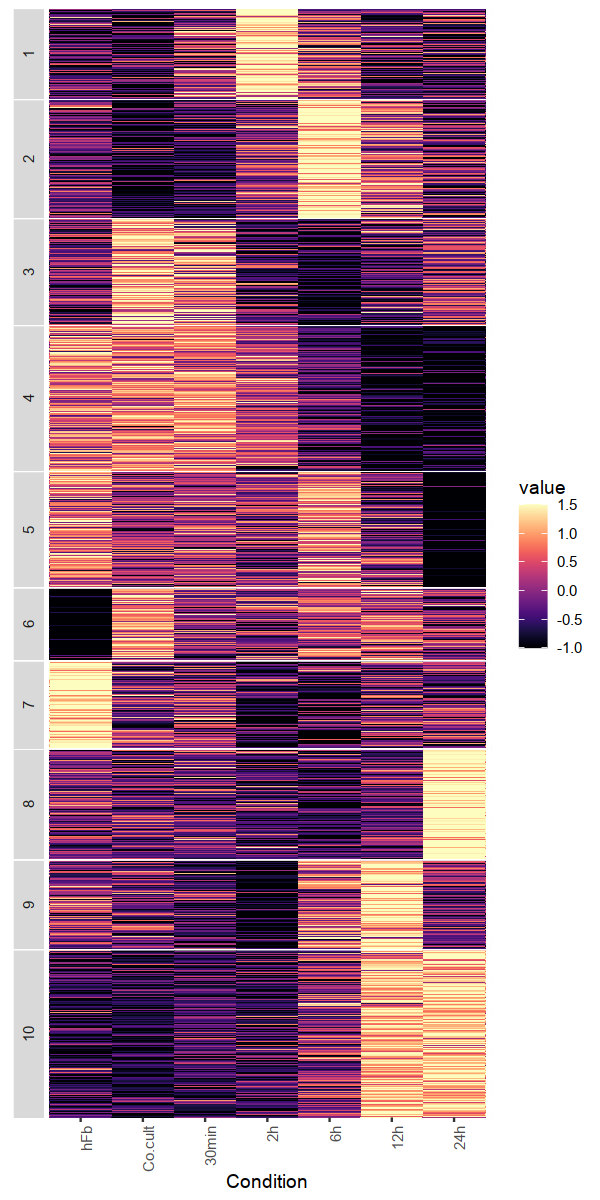

In [175]:
options(repr.plot.width = 5, repr.plot.height = 10)

idxs = seq(1, nrow(log_tpm_het_znorm), 10) # if subsample

ggplot(data = melt(log_tpm_het_znorm[order(pr_mb),][idxs, ]), 
       mapping = aes(x = Var2,
                     y = Var1,
                     fill = value)) +
geom_tile()  + ylab(NULL) + xlab("Condition") +  
geom_raster(aes(fill=value)) +
scale_fill_viridis(limits=c(-1, 1.5), oob=squish, option = "A") +
# scale_fill_viridis(option="A") + 
# scale_fill_gradient2(low="red", mid="black", high="blue") +
facet_grid(sort(pr_mb)[idxs] ~ ., switch = "y", scales = "free_y", space = "free_y")+
# theme_classic() +
theme(axis.text.x=element_text(angle=90,hjust=1),
      axis.text.y=element_blank(),
      axis.ticks.y=element_blank(),
      panel.spacing.y = unit(0.04, "cm"))
#       strip.text.y = element_text(size = 3))  
#       strip.background = element_rect(size = 0.1))

# ggsave(sprintf("figs/%s_heatmap_idr_n%d.jpeg", format(Sys.Date(), format='%Y%m%d'), length(table(pr_mb))),
#        dpi=1000)

In [176]:
pr_mb_by_gene = pr_mb
names(pr_mb_by_gene) = rownames(log_tpm_het_znorm)

In [224]:
pr_mb_by_gene["SIRT1"]

SIRT1 
    1

In [145]:
gene_sets= list()

for (i in seq(10)) {
    gene_sets[[i]] = as.character(unlist(read.table(sprintf("../20200828_RNA_Seurat/gene_sets/20201012_tmp_gridmap_znorm_n10/idx%d.txt", i))$V1))
}

In [146]:
head(gene_sets[[4]])

[1] "ANKRD65" "CA6"     "PHACTR4" "CFAP57"  "NFIA"    "LEPR"

In [151]:
s(pr_mb_by_gene[gene_sets[[4]]])

[1] 198

In [248]:
table(pr_mb_by_gene[gene_sets[[8]]])


  1   2   3   4   5   6   7   8   9  10 
 16 116   3   4  32   5  17   7  70  59 

In [238]:
cur_genes = names(pr_mb_by_gene[gene_sets[[7]]])[pr_mb_by_gene[gene_sets[[7]]] %in% c(8,10)]
cur_genes

[1] "DRAXIN"     "SFN"        "TENT5B"     "SYTL1"      "MYCL"      
  [6] "PRDX1"      "UQCRH"      "PCSK9"      "PATJ"       "AK4"       
 [11] "FNBP1L"     "CHI3L2"     "IGSF3"      "F11R"       "TSTD1"     
 [16] "NECTIN4"    "GAS5"       "LAMC2"      "LRRN2"      "FLVCR1"    
 [21] "LEFTY2"     "MIXL1"      "PARP1"      "DESI2"      "TMEM178A"  
 [26] "BCL11A"     "AC012368.1" "LGALSL"     "PAIP2B"     "MERTK"     
 [31] "CDCA7"      "TMEFF2"     "FZD5"       "RPL37A"     "IGFBP2"    
 [36] "B3GNT7"     "PTMA"       "INPP5D"     "CACNA2D2"   "IL17RD"    
 [41] "FLNB"       "DPPA4"      "COX17"      "FAM162A"    "CNBP"      
 [46] "HMCES"      "TMCC1"      "ZMAT3"      "ST6GAL1"    "NMU"       
 [51] "TMEM150C"   "CDS1"       "SPP1"       "HERC5"      "AC093866.1"
 [56] "PITX2"      "FAM169A"    "SERINC5"    "RPS23"      "DCP2"      
 [61] "FBN2"       "SNHG4"      "PCDH1"      "PPARGC1B"   "SERPINB9"  
 [66] "POU5F1"     "PI16"       "CRIP3"      "ZNF318"     "RRAGD"     
 [71] "CD24"       "SESN1"      "RPS12"      "MAP7"       "MYCT1"     
 [76] "FAM221A"    "PGAM2"      "SNHG15"     "TES"        "PODXL"     
 [81] "KLRG2"      "ATG9B"      "NEFM"       "NEFL"       "GNRH1"     
 [86] "LYPLA1"     "RPS20"      "CHD7"       "SNHG6"      "RPL7"      
 [91] "CHMP4C"     "CA2"        "CALB1"      "LAPTM4B"    "PVT1"      
 [96] "EPPK1"      "RPL8"       "VLDLR"      "GLDC"       "GCNT1"     
[101] "GNA14"      "SEMA4D"     "ZNF483"     "PTBP3"      "STRBP"     
[106] "DIPK1B"     "KIAA1217"   "ALOX5"      "ANK3"       "COMTD1"    
[111] "CDHR1"      "FRAT2"      "PGAM1"      "NEURL1"     "COL17A1"   
[116] "GSTO2"      "NANOS1"     "RPLP2"      "RPL27A"     "LGR4"      
[121] "TSPAN18"    "ASRGL1"     "PLAAT3"     "GSTP1"      "UCP2"      
[126] "NECTIN1"    "ESAM"       "RIMKLB"     "SINHCAF"    "RESF1"     
[131] "BICD1"      "KIF21A"     "RND1"       "METTL7A"    "KRT8"      
[136] "KRT18"      "GLS2"       "KCNMB4"     "PTPRB"      "PAWR"      
[141] "FGD6"       "RPLP0"      "TRIAP1"     "RFLNA"      "SCARB1"    
[146] "RPL21"      "ITM2B"      "CCNB1IP1"   "RNASE1"     "SLC7A8"    
[151] "REC8"       "PAX9"       "RPS29"      "GCH1"       "STON2"     
[156] "GCHFR"      "SPINT1"     "MYEF2"      "LINGO1"     "RPS17"     
[161] "KREMEN2"    "TMC7"       "NDUFAB1"    "SULT1A1"    "ZNF423"    
[166] "IL34"       "FA2H"       "GCSH"       "SLC47A1"    "ALDH3A2"   
[171] "TRAF4"      "PIPOX"      "RPL23"      "PNMT"       "FDXR"      
[176] "ACOX1"      "ST6GALNAC1" "TYMSOS"     "B4GALT6"    "CELF4"     
[181] "LINC02582"  "MBP"        "TNFSF9"     "CD70"       "SH2D3A"    
[186] "RPS28"      "ISYNA1"     "SPINT2"     "PPP1R14A"   "RPS16"     
[191] "CEACAM1"    "TMEM160"    "BBC3"       "RPL13A"     "RPS11"     
[196] "LIM2"       "MRPS26"     "FERMT1"     "AHCY"       "ADA"       
[201] "SULF2"      "ZFAS1"      "SALL4"      "RPS21"      "CXADR"     
[206] "MX1"        "ITGB2"      "CHCHD10"    "MIF"        "DDT"       
[211] "SUSD2"      "TTC28-AS1"  "TCN2"       "BIK"        "ARHGAP8"   
[216] "DMD"        "PCSK1N"     "PIM2"       "PGK1"       "BEX2"      
[221] "SLC25A5"    "SMIM10L2A"  "SPANXB1"    "MT-ND2"     "MT-ND4"    
[226] "MT-ND5"     "MT-ND6"

In [239]:
sort(cur_genes[grep("^RP[L|S]", cur_genes)])

[1] "RPL13A" "RPL21"  "RPL23"  "RPL27A" "RPL37A" "RPL7"   "RPL8"   "RPLP0" 
 [9] "RPLP2"  "RPS11"  "RPS12"  "RPS16"  "RPS17"  "RPS20"  "RPS21"  "RPS23" 
[17] "RPS28"  "RPS29"

In [188]:
write.table(names(pr_mb_by_gene[gene_sets[[7]]])[pr_mb_by_gene[gene_sets[[7]]] %in% c(8,10)], "tmp.txt", row.names=F, col.names=F, quote=F)

In [160]:
table(pr_mb_by_gene[gene_sets[[7]]])/((table(pr_mb_by_gene)/length(pr_mb_by_gene))*sum(table(pr_mb_by_gene[gene_sets[[7]]])))


        1         2         3         4         5         6         7         8 
0.5528694 0.8149748 0.6796915 0.4738464 0.2619048 0.4633647 0.5403190 1.9305426 
        9        10 
0.8694316 2.4576639 

In [199]:
length(rownames(tpm_het_avg)[grep("^RPS", rownames(tpm_het_avg))])

[1] 140

In [244]:
sum(cur_genes[grep("^RP[L|S]", cur_genes)] %in% lol)

[1] 4

In [246]:
for (i in seq(10)) {
    print(i)
    print(lol[lol %in% gene_sets[[i]]])
}

[1] 1
character(0)
[1] 2
 [1] "ALDOC"  "CCND2"  "CHEK2"  "GJA1"   "MSH2"   "PDPN"   "PHC1"   "SEPHS2"
 [9] "SQLE"   "TERF1"  "WEE1"   "ZIC3"  
[1] 3
[1] "AMOTL2" "CCND1"  "FDPS"   "FGFR1" 
[1] 4
[1] "MID1IP1" "MYC"     "NOP10"   "SOX2"   
[1] 5
[1] "CDKN1C" "CRABP2"
[1] 6
[1] "CSRP2"  "TCF7L1"
[1] 7
 [1] "AK4"     "BCAT1"   "CDCA7"   "GLDC"    "GNA14"   "HMGN5"   "LYPLA1" 
 [8] "NDUFAB1" "PARP1"   "PIPOX"   "PRDX1"   "PROM1"   "RCC2"    "RPL27A" 
[15] "RPS12"   "RPS16"   "RPS23"   "SINHCAF" "SLC25A5" "SLC2A1"  "TIMM13" 
[22] "TIMM8B"  "UQCRH"  
[1] 8
 [1] "AURKA"    "AURKB"    "BIRC5"    "BRIX1"    "BUB1"     "BUB1B"   
 [7] "CCNA2"    "CCNB2"    "CCNF"     "CDC20"    "CDC6"     "CDCA3"   
[13] "CDCA5"    "CDCA8"    "CDK1"     "CDKN3"    "CHAF1A"   "CKAP2"   
[19] "CKS1B"    "CKS2"     "CYCS"     "DBF4"     "DEK"      "DLGAP5"  
[25] "DTL"      "DTYMK"    "EBNA1BP2" "EIF4EBP1" "FAM136A"  "GMNN"    
[31] "GTSE1"    "HELLS"    "HMGB2"    "HNRNPAB"  "HSPE1"    "JPT1"    
[37] "KIF11"    "